#### Step 1: PreQC step before running on Geneious
#### Sample ID check (Check length of the Sample ID such as AMD_ID) 
#### Sample count check (Count number of samples - For example how many samples did Stefano ran?)
#### Below block is the code for running the preQC

Malaria has been a major illness in Africa. The drug resistance of malaria is making it more difficult to treat the patients with Malaria. To overcome the drug resistance CDC is developing a surveillance protocol for tracking drug ressitance of malarial genes. As part of the protocol and basic step we analyze Plasmodium Falciparum genes gained for patients. This ReadME is for other users to understand the work I've done which analyzes genes and reports findings. 

## Step 2: ReadMe for Geneious workflow and scripts for reports for lab and EPI

####  1. Importing raw fastq files
        First import the raw fastq files to geneious. Then, select whole samples then click sequence on top menu. After clicking sequence, click set paired reads.
        For the option select paired reads and delete unpaired ones.
####  2. Geneious Workflow
    Geneious Workflow contains mainly four steps for processing raw sequences to variants and coverage. You select a samples then go to workflows and run the SNP_Coverage_Analysis.geneiousWorkflow. Then, it automatically runs all the below steps from a -> d. 
    
###### a. Trimming (Discard unnecessary reads that would cause noise to the data)
    Geneious uses BBduk for trimming raw sequences. The settings are
    1. Trim Adapters: All Truseq, Nextera and PhilX adapters 
    ✓ Trim Right End
    ✓ Kmer Length 27 
    ✓ Maximum Substitutions 1 
    ✓ Maximum Substitutions + INDELs: 0,
    2. Trim Low quality: 
    ✓Both Ends 
    ✓Minimum Quality 35
    3. Trim Adapters based on paired read overhangs: Minimum Overlap: 24
    4. Discard Short Reads: Minimum Length: 150 bp

###### b. Map to Reference (To observe differences in genetic structure from reference)
    The workflow uses Map to reference for algining reads to the reference
    1. Dissolve contigs and re-assemble: reference sequecne is updated_MaRS_refs_ET (6sequences), 
    Assemble each sequence list separately
    2. Mapper: 
    ✓ Bowtie2 
    ✓ alginment Type: End to End 
    ✓ Use Preset: High Sensitivity/Medium
    3. Do not trim (discrad trim annotations)
    4. Save contigs
    
###### c. Find Variations/SNPs (To find the unique genetic structure from the samples)
    1. Find Variants: Minimum Variant Frequency: 0.05
    2. Analtze effect of variants on translations : Default Genetic Code, Standard
    3. Advanced: Use separate annotations for each variant at a position
     ✓ Record names of all contributing sequences of each variant
     ✓ Only find variations in annotation types = TrackerSNP
     ✓ Also find varations within 0bases of those types
     ✓ CDS properties to Copy: gene, product, protein_id, locus, tag, note.
    
###### d. Find coverage (To see if there are WildTypes we are interested )
    1. Only Find in: Annotations in reference sequence of type: TrackerSNP, Create coverage annotations on reference sequence
    2. High Coverage: Find regions with coverage above, number of sequences: 0
    
###### e. Selecting workflow outputs (contigs )
    1. After the workflow is done contig documents will be generated in the same folder with AMD_ID and gene information
    2. To select the contigs you click on modified 
    * If you can't see modified header scroll to the right 
    3. Then select the files that are generated later with AMD_ID and gene information in the document title
    
###### f. Export findings to a csv raw output (To process more data )
    1. Select all the documents with coverage and variant information
    * Select in as mentioned in step e
    2. Select all the columns
    3. Select all the types
    4. Export table 
    * Export as Annotations.csv


#### 2. Python scripts for Geneious raw input
###### a. Read Annotations.csv file and process
    1. Python script has with open function to open file and read each lines from the file
    2. Each jupyter note script will process Geneious raw output for different purposes.

###### b. File1: DF_Analysis1.ipynb/DF_Analysis1_EP.ipynb
    1. There are two versions one for lab and another one for EPI
    2. This version is written using pandas dataframe.
    3. The output gives information such as SITE,Sequence Name,G_Annotation,SNP,Mutation,WildType,VAF



    
    
  



## Step 3-1: Dataframe analysis for individual samples from raw Geneious output, "Annotation.csv" 

 ### Required packages
 - Pandas as pd
 
 ### Inputs
 - Geneious SNP analysis of _k13_, _crt_, _mdr1_, _dhfr_, _dhps_, and _cytb_
 - Documentation on Geneious analysis can be found: Readme.md
 - Geneious outputs were modified to AN19_individual_EPI.csv from "Annotation.csv"
 
 ### Process Description
 - This block is for creating a dataframe and a csv file for individual samples from raw Geneious output
 
 
 ### Data structure 
 - [Long-form](https://seaborn.pydata.org/tutorial/data_structure.html#long-form-vs-wide-form-data) 
     - Each variable is a column 

         - "Sample" = *AMD ID*, including associated meta-data for each sample
             - AMD ID and bit code key is found under MS Teams > Domestic > Files > Sample Naming > Sample_naming_key.pptx  

             - Key: **Year Country State/Site DayofTreatment Treatment SampleID Genus SampleType GeneMarker-8bitcode SampleSeqCount**

                 - Example:
                     - Individual sequenced sample ID: 17GNDo00F0001PfF1290 = 2017 Guinea Dorota Day0 AS+AQ 0001 P.falciparum FilterBloodSpot k13-crt-mdr-dhfr-dhps-cytB-cpmp-pfs47 

                     - Pooled sequenced sample ID: 17GNDoxxx001P10F1290 = 2017 Guinea Dorota **xx x** 001 **Pooled SamplesInPool** P.falciparum FilterBloodSpot k13-crt-mdr-dhfr-dhps-cytB-cpmp-pfs47 

                         - NOTE: If information is not availble (na) **x** is used. For pooled samples, DayofTreatment and Treatment is na since its a pool of multiple samples with that info. 
                         - NOTE: For pooled samples, **Genus** is replaced with **Pooled** and **SampleType** with **SamplesInPool** to indicated this as a pooled sequenced sample and sample count in each pool. 
         <p>&nbsp;</p>
         - "Year" = the year the study was conducted 
         - "Site" = the state or province 
         - "Day_of_treatment" = describes the day of treatment provided to the patient 
         - "Gene" = drug resistant gene(s) 
         - "G_annotation" = full SNP annotation in the following format: WildTypeAA-CodonPosition-MutantAA 
         - "Coverage" = the number of reads covering the SNP 
         - "VAF" = variant allele frequency calculated by AA divided by total reads in loci
         - "VF" = variant frequency calculated by AA divided by total reads in loci
         - "SNP" = single nucleotide polymorphism in WildTypeAA or MutantAA annotation format 
         - "Type" = describes if it is a wild type or mutant SNP 
         - "Poolsize" = describes how many samples in the pool 
         - "Poolgroup" = describes which trial it belongs too 

     - Each observation is a row for each sample ID (patient ID) 

In [1]:
import pandas as pd           ## Import Pandas library for processing dataframe as pd
import numpy as np            ## Import Numy for processing matrix as np
import sys                    ##Import sys library for maximizing the csv limit for large csv file which can be Geneious file.
import csv                    ##Import csv module to input the csv file to dataframe 

csv.field_size_limit(sys.maxsize)                                                                                                         ##Maximize the csv file input size
Geneious_raw_DF=pd.read_csv("Annotations.csv", engine='python', error_bad_lines=False)                                                    ##Import raw Geneious output table for variant analysis genes. Set up engine equals python and error_bad_lines for preventing errors with processing large csv files
Geneious_DF_filtered_poly=Geneious_raw_DF[(Geneious_raw_DF['Type']=='Polymorphism') & (Geneious_raw_DF['Amino Acid Change'].notnull())]   ##If the type column contains polymorphism and Amino Acid Change column is not empty then create a dataframe satisfying those conditions
Geneious_DF_filtered_cov=Geneious_raw_DF[Geneious_raw_DF['Type']=='Coverage - High']                                                      ##If the Coverage - High is in the type column as value then select dataframe for those column values
Geneious_DF_filtered_poly["TrackerSNP"]=(Geneious_DF_filtered_poly["Amino Acid Change"].astype(str).str[0]+                               ##Create a TrackerSNP Column which has both amino acid before the change
Geneious_DF_filtered_poly["CDS Codon Number"].astype(int).astype(str)+                                                                    ##Create a TrackerSNP Column which has CDC Codon number for amino acid change location
Geneious_DF_filtered_poly["Amino Acid Change"].astype(str).str[-1])                                                                       ##Create a TrackerSNP Column which has both amino acid after the change
Pre_Combined_Variant_Wildtype = [Geneious_DF_filtered_poly, Geneious_DF_filtered_cov]                                                     ##Produce a complete dataframe which contains both variants and wildtypes
Combined_Vi_Wi = pd.concat(Pre_Combined_Variant_Wildtype)                                                                                 ##Concatenate the dataframes for variants and wildtypes
Combination_filtered_dup=Combined_Vi_Wi.drop_duplicates(subset =["Document Name", "TrackerSNP"] )                                         ##Drop duplicates meaning if the values are already in variants then drop it from the wildtypes
                                                                                                                                          ##The dataframe contains information, "Sample,Pooled,Year,SITE,TreatmentDay,GENE,G_annotation,COVERAGE,VAF,VF,SNP,TYPE\n")

def site(row):                                ##Set up a function for assignging site based on the values in the document name column. This will change with each study please update the sites. 
    if row['Document Name'][4:6]=="Ak": ##Assign Bengeula for the abbreviation
        return 'Ankazomborona'
    elif row['Document Name'][4:6]=="At": ##Assign Lunda Sul for the abbreviation
        return 'ANTSENAVOLO'
    elif row['Document Name'][4:6]=="Ma": ##Assign Zaire for the abbreviation
        return 'Matanga'
    elif row['Document Name'][4:6]=="Vo": ##Assign Zaire for the abbreviation
        return 'VOHITROMBY'
    
def Pooledsize(row):                                          ##Set up a function for assigning TreatmentDay based on the values in the document name column
    if row['Document Name'].replace(" ","")[13:14]=="0":      ##If 0 in the position 13 of the string
        return row['Document Name'].replace(" ","")[14:15]    ##then assign only position 14 as pooled size
    elif row['Document Name'].replace(" ","")[13:14]!="0":    ##If 0 not in the position 13 of the string
        return row['Document Name'].replace(" ","")[13:15]    ##then assign the string from 13 and 14
    
def Pooled(row):                                              ##Set up a function for Pooled based on the values in the document name column
    if row['Document Name'].replace(" ","")[12:13]=="p":      ##If position 12 has p in it
        return 'pooled'                                       ##then it is considered pooled sample
    elif row['Document Name'].replace(" ","")[12:13]!="p":    ##If position 12 has no p in it
        return 'individual'                                   ##then it is considered individual sample

def year(row):  ##Set up a function for Year  based on the values in the document name column
    return row['Document Name'][0:2]

def type_SNP(row):  ##Set up a TYPE column based on given value in the Type whether it is mutation or wildtype
    if row['Type'] =='Polymorphism':  ##Type is either mutation or wildtype
        return "mutation"
    if row['Type'] =='Coverage - High':
        return "wildtype"
    
def SNP(row):  ##Set up a SNP column to give pre or post amino acid changes based on mutation or wildtype
    if row['Type'] =='Polymorphism':  ##Set up SNP notation for wildtype or mutation
        return row['TrackerSNP'][1::]
    if row['Type'] =='Coverage - High':
        return row['TrackerSNP'][0:-1]
    
# Dhruvi: added this below to split the document name and now in step2, no error occurs due to reruning the code.
def name(row):
    return row['Document Name'].split("_")[0].replace(" ","") ##Split the document name with _ and assign first substring to clean up the name of the sample
  
#Dhruvi : ##Apply the functions defined previously for assigning site,TreatmentDay,Pooled,year,type,SNP,name
Combination_filtered_dup[["SITE","Pooled","Year","TYPE","SNP","Document Name" ,"Pooledsize"]] = Combination_filtered_dup.apply([site,Pooled,year,type_SNP,SNP,name,Pooledsize], axis=1)

Combination_report1=Combination_filtered_dup[Combination_filtered_dup['Type']=='Polymorphism'] ##Select columns with mutations
Combination_report2=Combination_filtered_dup[Combination_filtered_dup['Type']=='Coverage - High'] ##Select columns with wildtypes
final_report1=Combination_report1[["Document Name","Sequence Name","SITE","Pooled","Year","Coverage","Variant Frequency","Variant Raw Frequency","TrackerSNP","TYPE","SNP","Pooledsize"]] ##Assign sample information to samples with mutation
final_report2=Combination_report2[["Document Name","Sequence Name","SITE","Pooled","Year","Average Coverage","Variant Frequency","Variant Raw Frequency","TrackerSNP","TYPE","SNP","Pooledsize"]] ##Assign sample information to samples with wildtypes
final_report2_re=final_report2.rename(columns={'Average Coverage': 'Coverage'}) ##Change the name of average coverage to coverage for samples with wildtypes
final_combine=[final_report1, final_report2_re] ##Combine the information from wildtypes and mutations into one dataframe
final_combine_2=pd.concat(final_combine) ##concatenate
#print(final_combine_2)
#print(final_combine_4)
###This part is for polishing lab version of individual
final_combine_4=final_combine_2[final_combine_2["Pooled"]=="individual"] ##In order to create table just for individual for Matt's report 
#print(final_combine_4)
##create another dataframe where Pooled column is just individual
#Dhruvi : replace the rename part with one line code using dictonary
final_combine_4=final_combine_4.rename(columns={'Document Name': 'Sample','Sequence Name': 'GENE','TrackerSNP': 'G_annotation', 'Coverage': 'COVERAGE','Variant Frequency': 'VAF','Variant Raw Frequency': 'VF' })

final_combine_4=final_combine_4.replace({'DHPS_437Corrected ': 'DHPS'})  ##Rename DHPS_437Corrected values to DHPS to correct the name

#Dhruvi : we can remove this part as sample name is already splited at begining using name function.


cols = list(final_combine_4.columns) ##Change columns into list
a, b = cols.index('SNP'), cols.index('TYPE') ##Index the column to swtich the order to match the previous Guinea report
cols[b], cols[a] = cols[a], cols[b] ##Change order of the column
final_combine_4 = final_combine_4[cols] ##After reordering the columns reassign to the dataframe
# Dhruvi: fill the empty value on multiple columns using dict
values = {"VAF": "0%", "VF": "0"}
final_combine_4 = final_combine_4.fillna(value=values)

final_combine_4=final_combine_4.replace({'Pf': 1})
final_combine_4=final_combine_4.replace({'xx': 1})

#final_combine_4=final_combine_4[final_combine_4['SITE'].notnull()] ##Check if the site is empty or not and assign site 
final_combine_4.to_csv("NG21_individual_EPI.csv", sep=',', index=False) ##Create a file with the dataframe for testing purpose this is internal lab version

df_voi=pd.read_csv("voinew3.csv")
df_voi["VOI"]=df_voi["RefAA"]+df_voi["AAPos"].astype(str)+df_voi["AltAA"]
voi_list=df_voi["VOI"].tolist()

final_combine_4_voi=final_combine_4[final_combine_4.G_annotation.isin(voi_list)]
#print(final_combine_4_voi)
final_combine_4_voi.to_csv("NG21_individual_EPI_VOI.csv", sep=',', index=False)

/tmp/ipykernel_2978/330623665.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Geneious_raw_DF=pd.read_csv("Annotations.csv", engine='python', error_bad_lines=False)                                                    ##Import raw Geneious output table for variant analysis genes. Set up engine equals python and error_bad_lines for preventing errors with processing large csv files
/tmp/ipykernel_2978/330623665.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Geneious_DF_filtered_poly["TrackerSNP"]=(Geneious_DF_filtered_poly["Amino Acid Change"].astype(str).str[0]+                               ##Create a TrackerSNP Column which has both amino acid 

## Step 3-2: Dataframe analysis for pooled samples from raw Geneious output, "Annotation.csv" 

 ### Required packages
 - pandas as pd
 
 ### Inputs
 - Geneious SNP analysis of _k13_, _crt_, _mdr1_, _dhfr_, _dhps_, and _cytb_
 - Documentation on Geneious analysis can be found: Readme.md
 - Geneious outputs were modified to AN19_pooled_EPI.csv from "Annotation.csv"
 
 
 ### Process Description
 - This block is for creating a dataframe and csv file for pooled samples from raw Geneious output
 - It doesn't create a csv file but a dataframe that has both individual and pooled samples
 
 ### Data structure 
 - [Long-form](https://seaborn.pydata.org/tutorial/data_structure.html#long-form-vs-wide-form-data) 
     - Each variable is a column 

         - "Sample" = *AMD ID*, including associated meta-data for each sample
             - AMD ID and bit code key is found under MS Teams > Domestic > Files > Sample Naming > Sample_naming_key.pptx  

             - Key: **Year Country State/Site DayofTreatment Treatment SampleID Genus SampleType GeneMarker-8bitcode SampleSeqCount**

                 - Example:
                     - Individual sequenced sample ID: 17GNDo00F0001PfF1290 = 2017 Guinea Dorota Day0 AS+AQ 0001 P.falciparum FilterBloodSpot k13-crt-mdr-dhfr-dhps-cytB-cpmp-pfs47 

                     - Pooled sequenced sample ID: 17GNDoxxx001P10F1290 = 2017 Guinea Dorota **xx x** 001 **Pooled SamplesInPool** P.falciparum FilterBloodSpot k13-crt-mdr-dhfr-dhps-cytB-cpmp-pfs47 

                         - NOTE: If information is not availble (na) **x** is used. For pooled samples, DayofTreatment and Treatment is na since its a pool of multiple samples with that info. 
                         - NOTE: For pooled samples, **Genus** is replaced with **Pooled** and **SampleType** with **SamplesInPool** to indicated this as a pooled sequenced sample and sample count in each pool. 
         <p>&nbsp;</p>
         - "Year" = the year the study was conducted 
         - "Site" = the state or province 
         - "Day_of_treatment" = describes the day of treatment provided to the patient 
         - "Gene" = drug resistant gene(s) 
         - "G_annotation" = full SNP annotation in the following format: WildTypeAA-CodonPosition-MutantAA 
         - "Coverage" = the number of reads covering the SNP 
         - "VAF" = variant allele frequency calculated by AA divided by total reads in loci 
         - "SNP" = single nucleotide polymorphism in WildTypeAA or MutantAA annotation format 
         - "Type" = describes if it is a wild type or mutant SNP 

     - Each observation is a row for each sample ID (patient ID) 

In [2]:
#pooled_part1=pd.read_csv("Pooled_Info.csv") ##import a file with information about pooled samples

#final_combine_2.rename(columns={'Document Name':'AMD ID (Pooled)'}, inplace=True) ##Reanme the document name to AMD_ID

df_merged_poolsize = final_combine_2#[final_combine_2["Pooled"]=="pooled"] ##merge the information based on AMD_ID to add pooled columns and pooled size columns
df_merged_poolsize=df_merged_poolsize.replace({'DHPS_437Corrected ': 'DHPS'})
#df_merged_poolsize = df_merged_poolsize.drop(['SITE ','Year_y'], axis=1) ##Get rid of duplicate columns which is SITE and year_y

#df_merged_poolsize.PoolSize.fillna(value=1, inplace=True) ##Fill empty values for poolsize for individual with 1s

df_merged_poolsize['Variant Frequency'] = df_merged_poolsize['Variant Frequency'].fillna("0%") ##Fill the empty Variant Frequency value with 0
df_merged_poolsize['Variant Raw Frequency'] = df_merged_poolsize['Variant Raw Frequency'].fillna(0) ##Fill empty values with 0s
#print(df_merged_poolsize)
#df_merged_poolsize["Prod"]=df_merged_poolsize["Variant Frequency"].str.split('%').str[0].str.strip("%").astype(float)*df_merged_poolsize["Pooledsize"].astype(float) ##Get a product by multiplying variant frequency times the pool size
df_merged_poolsize.rename(columns={'Variant Frequency':'VAF', 'Variant Raw Frequency':'VF'}, inplace=True) ##Reanme the document name to AMD_ID
df_merged_poolsize['Coverage'] = df_merged_poolsize['Coverage'].apply(str) ##Change values from numeric to string
df_merged_poolsize['VAF'] = df_merged_poolsize['VAF'].apply(str) ##Change values from numeric to string
df_merged_poolsize['VF'] = df_merged_poolsize['VF'].apply(str)  ##Change values from numeric to string
df_merged_poolsize.Coverage= df_merged_poolsize.Coverage.str.split(" ").str[0]  ##Split the string by space for values with -> then pick the substring before the first space
df_merged_poolsize.VAF= df_merged_poolsize.VAF.str.split(" ").str[0] ##Split the string by space for values with -> then pick the substring before the first space
df_merged_poolsize.VF= df_merged_poolsize.VF.str.split(" ").str[0] ##Split the string by space for values with -> then pick the substring before the first space
df_merged_poolsize.rename(columns={'VAF': 'Variant Frequency', 'VF':'Variant Raw Frequency'}, inplace=True) ##Reanme the document name to AMD_ID
df_merged_poolsize=df_merged_poolsize.rename(columns={'Document Name': 'Sample','Sequence Name': 'GENE','TrackerSNP': 'G_annotation', 'Coverage': 'COVERAGE','Variant Frequency': 'VAF','Variant Raw Frequency': 'VF' })

df_merged_poolsize=df_merged_poolsize.replace({'Pf': 1})

df_merged_poolsize2=df_merged_poolsize[df_merged_poolsize["Pooled"]=="pooled"]
#df_merged_poolsize2 = df_merged_poolsize2.drop('Prod',  1)

df_merged_poolsize2.to_csv("NG21_pooled_EPI.csv", index=False)

df_merged_poolsize_ind_pool=df_merged_poolsize
#df_merged_poolsize2 = df_merged_poolsize2.drop('Prod',  1)

df_voi=pd.read_csv("voinew3.csv")
df_voi["VOI"]=df_voi["RefAA"]+df_voi["AAPos"].astype(str)+df_voi["AltAA"]
voi_list=df_voi["VOI"].tolist()

df_merged_poolsize2_voi=df_merged_poolsize2[df_merged_poolsize2.G_annotation.isin(voi_list)]

df_merged_poolsize2_voi=df_merged_poolsize2_voi.replace({'Pf': 1})

df_merged_poolsize2_voi.to_csv("NG21_pooled_EPI_VOI.csv", index=False)

df_merged_poolsize_ind_pool.to_csv("NG21_pooled_EPI_QC.csv", index=False)

df_merged_poolsize_ind_pool_voi=df_merged_poolsize_ind_pool[df_merged_poolsize_ind_pool.G_annotation.isin(voi_list)]

df_merged_poolsize_ind_pool_voi.to_csv("NG21_pooled_EPI_QC_voi.csv", index=False)

df_merged_poolsize=df_merged_poolsize.replace({'xx': 1})

df_merged_poolsize=df_merged_poolsize.replace({'Pf': 1})

df_merged_poolsize["Pooledsize"] = pd.to_numeric(df_merged_poolsize["Pooledsize"])

df_merged_poolsize["Prod"]=df_merged_poolsize["VAF"].str.split('%').str[0].str.strip("%").astype(float)*df_merged_poolsize["Pooledsize"].astype(float) ##Get a product by multiplying variant frequency times the pool size




 

## Step 3-3: Dataframe analysis for WVAF of samples from raw Geneious output, "Annotation.csv" 

 ### Required packages
 - pandas as pd
 
 ### Inputs
 - Geneious SNP analysis of _k13_, _crt_, _mdr1_, _dhfr_, _dhps_, and _cytb_
 - Documentation on Geneious analysis can be found: Readme.md
 - Geneious outputs were modified to AN19_weighted_bysite_EPI.csv from "Annotation.csv"
 
  ### Process Description
 - This block is for creating a dataframe and csv file for weighted VAF which created from the dataframe previously made with products of VAF and pooled sizes
 
 
 ### Data structure 
 - [Long-form](https://seaborn.pydata.org/tutorial/data_structure.html#long-form-vs-wide-form-data) 
     - Each variable is a column 

         - "Sample" = *AMD ID*, including associated meta-data for each sample
             - AMD ID and bit code key is found under MS Teams > Domestic > Files > Sample Naming > Sample_naming_key.pptx  

             - Key: **Year Country State/Site DayofTreatment Treatment SampleID Genus SampleType GeneMarker-8bitcode SampleSeqCount**

                 - Example:
                     - Individual sequenced sample ID: 17GNDo00F0001PfF1290 = 2017 Guinea Dorota Day0 AS+AQ 0001 P.falciparum FilterBloodSpot k13-crt-mdr-dhfr-dhps-cytB-cpmp-pfs47 

                     - Pooled sequenced sample ID: 17GNDoxxx001P10F1290 = 2017 Guinea Dorota **xx x** 001 **Pooled SamplesInPool** P.falciparum FilterBloodSpot k13-crt-mdr-dhfr-dhps-cytB-cpmp-pfs47 

                         - NOTE: If information is not availble (na) **x** is used. For pooled samples, DayofTreatment and Treatment is na since its a pool of multiple samples with that info. 
                         - NOTE: For pooled samples, **Genus** is replaced with **Pooled** and **SampleType** with **SamplesInPool** to indicated this as a pooled sequenced sample and sample count in each pool. 
         <p>&nbsp;</p>
         - "Site" = the state or province 
         - "Sequence Name" = name of Genes
         - "G_annotation" = full SNP annotation in the following format: WildTypeAA-CodonPosition-MutantAA
         - "Coverage" = the number of reads covering the SNP  
         - "SNP" = single nucleotide polymorphism in WildTypeAA or MutantAA annotation format 
         - "mutation" = describes total of mutation type samples
         - "wildtype" = describes total of wild type of samples
         - "WVAF" = Weighted variant allele frequency calculated by AA divided by total reads in loci
         - "Total" = describes total of mutation type + wild type of samples

     - Each observation is a row for each sample ID (patient ID) 

In [3]:
#print(df_merged_poolsize)
df_merged_count=df_merged_poolsize.groupby(['SITE','GENE','G_annotation', 'Pooled']).sum()  ##Sum the columns based on overlapping values on site, trackersnp, and pooled
#print(df_merged_count)
df_merged_countv=df_merged_poolsize.groupby(['SITE','GENE','G_annotation', 'Pooled', 'SNP']).sum() ##Sum the columns based on agreeing values on site, trackersnp, and pooled, and snp
df_merged_count=df_merged_count.groupby(['SITE','GENE','G_annotation']).sum() ##Sum again based on stie and tracker snp
df_merged_countv=df_merged_countv.groupby(['SITE','GENE','G_annotation','SNP']).sum() ##Sum again based on site, tracker, and snp
#df_merged_countv = df_merged_countv.drop('Pools ', 1) ##drop pooled information
df_merged_countv=df_merged_countv.reset_index()  ##Reset index so  that we can  use the columns
df_merged_countv['Type'] = np.where(df_merged_countv['SNP'].str[0].str.isdigit(), "Mutation" , "WildType") ##If the first character of SNP value is digit assign mutation  else assign wildtype
#print(df_merged_countv)
df_merged_countv.rename(columns={'Pooledsize':'Number_of_samples'}, inplace=True) ##Reanme the Poolsize to number  of samples
#print(df_merged_countv)
df_merged_countv['Tracker']=df_merged_countv['G_annotation'].str[:-1]
df_merged_countvp=df_merged_countv  ##Create another dataframe from previous dataframe this is for calculating products for VAF
df_merged_countv=df_merged_countv.pivot(index=["SITE", 'GENE',"G_annotation"], columns="Type", values="Number_of_samples") ##pivot and align mutation and wildtype
df_merged_countvp=df_merged_countvp.pivot(index=["SITE", 'GENE',"G_annotation"], columns="Type", values="Prod") ##pivot and align mutation and wildtype
"""
To do: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
This is where I am stuck. Trying using pivot to fix it
"""

df_merged_countvp=df_merged_countvp.reset_index() ##Reset indexes
df_merged_countv=df_merged_countv.reset_index()  ##Reset indexes

df_merged_countv['SNP'] = np.where(pd.isna(df_merged_countv['Mutation']), df_merged_countv['G_annotation'].astype(str).str[0:-1], df_merged_countv['G_annotation'].astype(str).str[1::]) ##Depending on codntion where mutation value is nan or not assign SNP with just first character or last character and amino acid position
cols = list(df_merged_countv.columns) ##Change column to list format
cols = cols[0:3] + cols[5:6] + cols[3:5] ##Adjust the column order by adding column as lists
df_merged_countv = df_merged_countv[cols] ##Return the column back to dataframe
df_merged_countv.rename(columns={'TrackerSNP':'G_Annotation'}, inplace=True) ##Change column name from trackersnp to g_annotation

#print(df_merged_countv)

df_merged_countv['Prod']= df_merged_countvp['Mutation'] ##Copy the mutation information which is sum of all the variant frequencies for each variant

df_merged_countv['Prod'] = df_merged_countv['Prod'].fillna(0) ##Fill empty values with 0s

df_merged_countv['Mutation'] = df_merged_countv['Mutation'].fillna(0) ##Fill empty values with 0s

df_merged_countv['WildType'] = df_merged_countv['WildType'].fillna(0) ##Fill empty values with 0s

"""
The next part requires assigning wildtype to irregular mutations which has different G_annotation
For this part I used for loop instead of dataframe
"""

dict_total={} ##Total number including both wildtype and mutations
dict_wild_re={} ##total number of wildtypes with ignoring last letter of G_annotation

for index, row in df_merged_countv.iterrows(): ##Create dictionary for total with given conditions
    if (row["SITE"],row['G_annotation'][0:-1]) not in dict_total: ##Check if the item is in the dictionary
        dict_total[row["SITE"],row['G_annotation'][0:-1]]=row['Mutation']+row['WildType'] ##Get the total of samples including mutation and wildtypes
        dict_wild_re[row["SITE"],row['G_annotation'][0:-1]]=row['WildType'] ##Aissgn wildtype to the wildtype dictionary
    else: ##If item is not in dictionary than add the total to the mutation
        dict_total[row["SITE"],row['G_annotation'][0:-1]]=dict_total[row["SITE"],row['G_annotation'][0:-1]]+row['Mutation']
    if dict_wild_re[row["SITE"],row['G_annotation'][0:-1]]==0: ###If no wildtype is assigned from previous mutation update the mutation
        dict_wild_re[row["SITE"],row['G_annotation'][0:-1]]=row['WildType']  ##Aissgn wildtype to the wildtype dictionary
        dict_total[row["SITE"],row['G_annotation'][0:-1]]=row['Mutation']+ dict_wild_re[row["SITE"],row['G_annotation'][0:-1]] ##Add wildtype plus the mutation to assign the total
        
###The purpose of below for loop is to add wildtypes to mutated one
for index, row in df_merged_countv.iterrows(): ###loop through merged dataframe by rows
    if (row["SITE"],row['G_annotation'][0:-1]) in dict_total and row['WildType']==0: ##Create a dictioanry and check if wildtype is 0
        df_merged_countv.at[index,'WildType'] = dict_wild_re[row["SITE"],row['G_annotation'][0:-1]] ##Assign wildtype based on subtracting mutation value from total value
dict_test_repeats={} 
for index, row in df_merged_countv.iterrows(): ##Assign dict_total if the sum of mutation + wildtype is bigger than already assigned value 
    if (row["SITE"],row['G_annotation'][0:-1]) not in dict_total: ##Loop again and check if the given item is not in dictionary
        dict_total[row["SITE"],row['G_annotation'][0:-1]]=row['Mutation']+row['WildType'] ##If the  item is not in dictionary then assign total  as sum of wildtype and mutation
    if (row["SITE"],row['G_annotation'][0:-1]) in dict_total: ###If given item is in the dictionary of total then check if sum of mutation and wildtype is bigger than the item in dictionary
        if row['Mutation']+row['WildType'] > dict_total[row["SITE"],row['G_annotation'][0:-1]]:
            dict_total[row["SITE"],row['G_annotation'][0:-1]]=row['Mutation']+row['WildType'] ##If sum of mutation and wildtype is bigger then assign new total
        
for index, row in df_merged_countv.iterrows(): ##Assign final total value and VAF to the value
    df_merged_countv.at[index,"Total"] = dict_total[row["SITE"],row['G_annotation'][0:-1]] ##After creating all the dictionaries assign as total
    df_merged_countv.at[index,'VAF'] = str(round((float(row['Prod']))/float(dict_total[row["SITE"],row['G_annotation'][0:-1]]),2))+"%" ##Assign VAF as well
    
###The question is is above sum correct as total numbers?
    
###Change order of columns to match the guinea report
cols = list(df_merged_countv.columns)  ##turn columns in to list
a, b = cols.index('VAF'), cols.index('Total') ##Switch reindex VAF and total columns
cols[b], cols[a] = cols[a], cols[b]
df_merged_countv = df_merged_countv[cols] ##Assign switched column orders

df_merged_countv = df_merged_countv.drop('Prod', 1) ##drop pooled information

df_merged_countv=df_merged_countv.replace({'DHPS_437Corrected ': "DHPS"})

df_voi=pd.read_csv("voinew3.csv")
df_voi["VOI"]=df_voi["RefAA"]+df_voi["AAPos"].astype(str)+df_voi["AltAA"]
voi_list=df_voi["VOI"].tolist()

df_merged_countv=df_merged_countv[df_merged_countv.G_annotation.isin(voi_list)]

df_merged_countv.to_csv("NG21_weighted_bysite_EPI.csv", sep=',', index=False)

#print(df_merged_countviz)

/tmp/ipykernel_2978/3726849090.py:84: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_merged_countv = df_merged_countv.drop('Prod', 1) ##drop pooled information


## Step 4-1: QC validation for total pooled and indvidual samples generated from step 3-1 and step 3-2

 ### Required packages
 - pandas as pd
 
 ### Inputs
 - output AN19_individual_EPI.csv file from step 3-1 (individual)
 - output AN19_pooled_EPI.csv file from step 3-2 (pooled) 
 
 
 ### Process
 - Creates dictionary with different sites and count numbers of individual and pooled within each sites
 
 
 ### Outputs
    -Number of pools for each site
    -sum of pools for each site
    -individual total samples for each site


In [4]:
dicttest={} ## Create a test dictionary to check if items in the test dictionary or not
dicttestind={} ##Create a dictionary for individuals to not count duplicatesd
dictcat={} ##Dictionary for assining different sites

with open("NG21_pooled_EPI.csv", "r") as r1: ##Loop thourgh pooled epi file
    for lines in r1:
        if lines[0:2].isdigit(): #and "xx" not in lines.split(",")[0]:
            dictcat[lines[0:6]]="exist" ##Create a dictionary for different sites based on first few strings of the lines
with open("NG21_individual_EPI.csv", "r") as r2: ##Loop through individual epi file
    for lines in r2:
        if lines[0:2].isdigit(): #and "xx" not in lines.split(",")[0]:
            dictcat[lines[0:6]]="exist"  ##Create a dictionary for different sites based on first few strings of the lines


for items in dictcat: ##Loop through different items, sites, with in the dictionary for site
    dicttest={} ##Create an empty dictionary and fill up the dictionary test for just pooled samples
    with open("NG21_pooled_EPI.csv", "r") as r1: ##Open the EPI file created from step 3-2
        for lines in r1:
            if items in lines:
                if "pooled" in lines:
                    dicttest[lines.split(",")[0]]=lines.split(",")[11] ##Assign pooled size to the dictionary
        sumpooled=0
        countpooled=0
        for item in dicttest:
            countpooled+=1
            if dicttest[item]!="xx\n":
                #print(dicttest[item])
                sumpooled+=float(dicttest[item].strip("\n"))
        print("Number of pools", items, countpooled) ##Print out number of pools 
        print("sum of pools", items, sumpooled) ##Print out sum of pools based on pool size for each pool
for items in dictcat:
    dicttestind={}  ##Create an empty dictionary and fill up the dictionary test for just individual samples
    with open("NG21_individual_EPI.csv", "r") as r2:
        for lines in r2:
            if items in lines:
                if "individual" in lines:
                    dicttestind[lines.split(",")[0]]="exist"
        countindividual=0
        for item in dicttestind:
            countindividual+=1
        print("individual total samples", items, countindividual)

Number of pools 20MDAk 56
sum of pools 20MDAk 180.0
Number of pools 20MDAt 49
sum of pools 20MDAt 163.0
Number of pools 20MDMa 47
sum of pools 20MDMa 171.0
Number of pools 20MDVo 51
sum of pools 20MDVo 175.0
individual total samples 20MDAk 0
individual total samples 20MDAt 4
individual total samples 20MDMa 18
individual total samples 20MDVo 16


## Step 4-2: QC validation for total pooled and indvidual samples generated from step 3-2

 ### Required packages
 - pandas as pd
 - numpy as np
 - seabron as sns
 - matplotlib.pyplot as plt
 
 ### Inputs
 - AN19_individual_EPI.csv file from step 3-1
 - AN19_individual_LAB.csv file from step 3-1
 
### Process
 - Uses a seaborn and process the dataframe with given variables to plot a diagram
 
 ### Data structure 
    -visulization plot
    -check nulls and empty values in the file


The number of rows, columns: (1355, 12)

There are 38 samples in this dataset.

The number of null or NA values in data:
Sample          0
GENE            0
SITE            0
Pooled          0
Year            0
COVERAGE        0
VAF             0
VF              0
G_annotation    0
SNP             0
TYPE            0
Pooledsize      0
dtype: int64

Plotting all SNPs categorized as wildtype or mutant using seaborn:


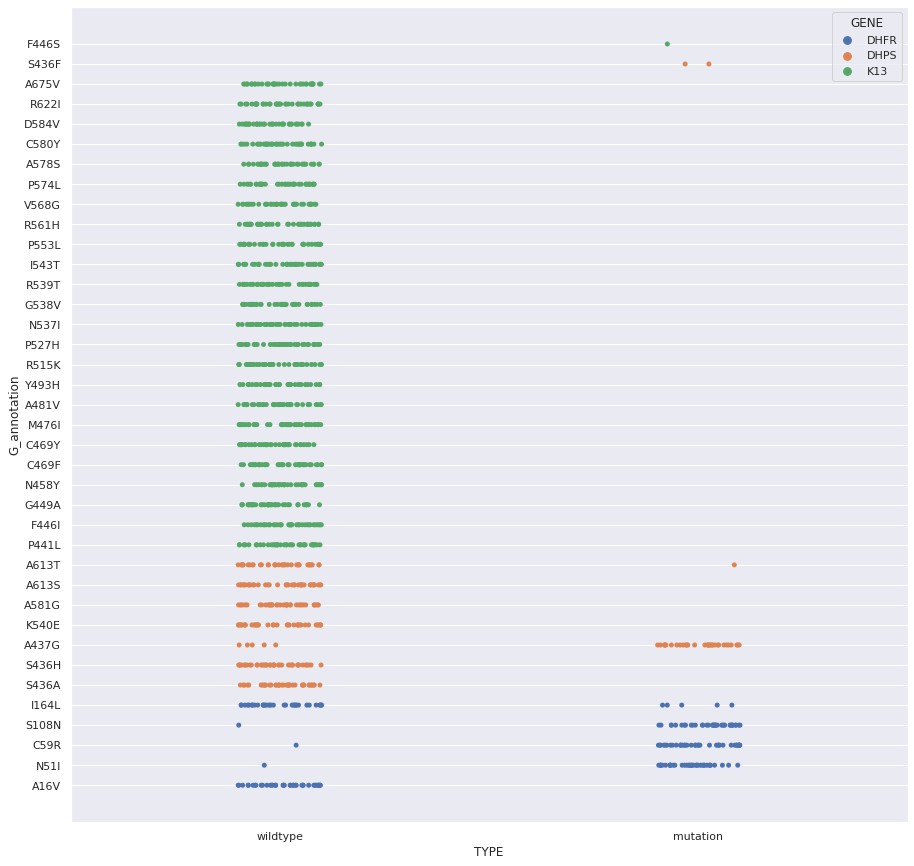

In [5]:
# Import dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load data
df = pd.read_csv("NG21_individual_EPI.csv")


# Check dataframe is correct 
df.head()

# Print number of rows and columns; confirm its longform data
print('The number of rows, columns:', df.shape) 
print('') # add space 

# Count number of unique samples in data 
uniq = df['Sample']
print('There are', uniq.nunique(), 'samples in this dataset.')
print('') # add space 

# Check if there are any Null or NAs 

print('The number of null or NA values in data:')
print(df.isnull().sum())
print('') # add space 

# Sort data based on CODONS to ensure shown as ascending/descending in plot 

LS = df['G_annotation']  # Copy the full annotated SNPs into a new list called LS 

codon_num = [] # create an empty list 

# Loop through G_annotation list (LS) and strip first and last character 
for x in LS: 
    codon_num.append(int(x[1:-1]))  # IMPORTANTLY change from string to integer to allow num sorting 
    ## TODO: make this more pythonic and use rstrip() and lstrip().left()

# Add the new Codon column to the current dataframe 
df['Codon'] = codon_num

# Set seaborn plot style and size (NOTE: some plots will not be affected; see seaborn docs) 

#sns.set_style("whitegrid")

# Set plot/figure size 
sns.set(rc = {'figure.figsize':(15,15)})

print('Plotting all SNPs categorized as wildtype or mutant using seaborn:')

# Plot as seaborn strippplot sorting by Codon # and then Gene in ascending order 

g= sns.stripplot(data=df.sort_values(by=['GENE','Codon'], ascending=True),
               x="TYPE", y="G_annotation",
                 hue="GENE")  



# Use catplot() to combine stripplot() and FacetGrid to further categorize data; below example is by Year 

# g= sns.catplot(data=df.sort_values(by=['GENE','Codon'], ascending=True),
#                x="TYPE", y="G_annotation", 
#                hue="GENE", col="Year")  

##TODO: 
## Adjsust size for catplot, difficult to see as is. Need to look at seaborn docs. 
## Figure out why sorting is broken (might to do something with iteration of catplot() 

#Save dataframe to csv 

# df.to_csv('organized.csv')

## Step 4-3: Check if total number of mutation + wildtype for each gene for each site is larger than total number of individual + pooled sizes

 ### Required packages
 - pandas as pd
 
 ### Inputs
 - AN19_individual_EPI.csv file from step 3-1
 
 ### Process
 - Checks if the total number of mutation and wildtype for each gene and each site is greater than total number of individual and pools calculated from step 4-1
 
 ### Data structure 
    -visulization plot
    -check nulls and empty values in the file


In [6]:
import pandas as pd
dictcat={}
with open("NG21_individual_EPI.csv", "r") as r2: ##Open individual EPI file for QC of EPI individaul
    for lines in r2:
        if lines[0:2].isdigit(): #and "xx" not in lines.split(",")[0]: ##Check if first two letters are digit to not count the controls
            dictcat[lines[0:6]]="exist" ##Assign first 6 letters of line as one of the categories

dict_site={} ##Create dictionary for site
for items in dictcat:
    dicttestind={}  ##Create dictionary for individual samples
    with open("NG21_individual_EPI.csv", "r") as r2:
        for lines in r2:
            if items in lines:
                dicttestind[lines.split(",")[0]]="exist" ##Assign different samples to the dictionary to prevent duplicates
        countindividual=0
        for item in dicttestind:
            countindividual+=1 ##Count the number of individuals and assign total individual counted to for each site
        dict_site[items]=countindividual
    
with open ("NG21_individual_EPI.csv", "r") as t1:
    dict_Samples={} ##dictionary for all the samples
    dict_Genes={}
    count=0
    for lines in t1: ##Add number of major, minor, 
        count+=1
        if count>1:
            dict_Genes[lines.split(",")[0],lines.split(",")[2],lines.split(",")[9],lines.split(",")[11].strip("\n")]="exist"  ##Assign sample name, site, G_annotation, and type of mutation to dictionary of genes


dict_count={} ##Crate a dictionary dict_count so that we could add count of genes based on it existing in the dictionary or not. So if it doesn't exist just assisgn 1 other wise add 1 to the current numbers
for items2 in dict_Genes:
    if (items2[1],items2[2]) in dict_count:    
        dict_count[items2[1],items2[2]]=dict_count[items2[1],items2[2]]+1
    if (items2[1],items2[2]) not in dict_count:
        dict_count[items2[1],items2[2]]=1

dict_site_trans={} ##Based on dict_site created before create a translator dicttionary for different sites to different sum of items
for items in dict_site:
    if "Ak" in items:
        dict_site_trans["Ankazomborona"]=dict_site[items]
    if "At" in items:
        dict_site_trans["ANTSENAVOLO"]=dict_site[items]
    if "Ma" in items:
        dict_site_trans["Matanga"]=dict_site[items]
    if "Vo" in items:
        dict_site_trans["VOHITROMBY"]=dict_site[items]
        
   
count=0
for items in dict_count:
    if dict_count[items]>dict_site_trans[items[0]]: ##Check if there were samples for each site that is larger than total number of samples.
        count+=1
        
print("There were", count,"samples that are over total individauls by site")
            
df=pd.DataFrame.from_dict(dict_count, orient='index')
df.to_csv("categorical_test1.csv", sep='\t')
            
        


There were 0 samples that are over total individauls by site


## Step 4-4: Create a table for minor, major, wildtype, ratios and total table for visualizing in seaborn  later

 ### Required packages
 - 
 
 ### Inputs
 - AN19_pooled_EPI.csv file from step 3-2
 
 ### Process
 - For loops through pooled_EPI_QC file which has both information about individaul and pooled samples. Extract information about major, minor, and wildtypes based on VAF. After the extraction finds the sum of the different types of mutations and ratios of the each mutations to the sum. At last creates a table with ratios and total sum to visualization in seaborn.
 
 
 ### Data structure 
    -Tab_Table_SNP_Total1.csv
    -The table contains ratios and sum of major, minor, and wildtypes.


In [7]:
df = pd.read_csv("NG21_weighted_bysite_EPI.csv")

df['Type'] = ["Wildtype: AF=0%" if float(x.strip("%"))==0 else 'Minor: AF < 50%' if 0<float(x.strip("%"))<50 else 'Major: AF >= 50%' for x in df['VAF']]
df_viz = pd.DataFrame()
df_type = pd.DataFrame()

df_type["GENE"]=df.groupby(["GENE","G_annotation","Type"]).sum().reset_index()["GENE"]
df_type["G_annotation"]=df.groupby(["GENE","G_annotation","Type"]).sum().reset_index()["G_annotation"]
df_type["Type"]=df.groupby(["GENE","G_annotation","Type"]).sum().reset_index()["Type"]
df_type["Mutation"]=df.groupby(["GENE","G_annotation","Type"]).sum().reset_index()["Mutation"]
df_type["WildType"]=df.groupby(["GENE","G_annotation","Type"]).sum().reset_index()["WildType"]

#print(df_type)

df_type["Major: AF >= 50%"]=np.where(df_type["Type"]=="Major: AF >= 50%", df_type["Mutation"], 0)
df_type["Minor: AF < 50%"]=np.where(df_type["Type"]=="Minor: AF < 50%", df_type["Mutation"], 0)
df_type["Wildtype: AF=0%"]=df_type["WildType"]

df_type=df_type.drop(['Type'], axis=1)

#print(df_type)

df_final=df_type.groupby(["GENE","G_annotation"]).sum().reset_index()

df_final["GENE_G_anno"]=df_final["GENE"]+":"+df["G_annotation"]

df_final=df_final.drop(['GENE','G_annotation'], axis=1)

df_final=df_final.drop(['Mutation','WildType'], axis=1)

df_final["Total"]=df_final["Wildtype: AF=0%"]+df_final["Major: AF >= 50%"]+df_final["Minor: AF < 50%"]

cols = list(df_final.columns)
a, b = cols.index('GENE_G_anno'), cols.index('Major: AF >= 50%')
cols[b], cols[a] = cols[a], cols[b]
df_final = df_final[cols]

#print(df_final)

df_final["Major: AF >= 50%"]=df_final["Major: AF >= 50%"]/df_final["Total"]
df_final["Minor: AF < 50%"]=df_final["Minor: AF < 50%"]/df_final["Total"]
df_final["Wildtype: AF=0%"]=df_final["Wildtype: AF=0%"]/df_final["Total"]

df_final.to_csv("Tab_Table_SNP_Total1_Comb.csv", index=False)

#print(df_final)

#print(df_type)




In [10]:
df = pd.read_csv("NG21_pooled_EPI_VOI.csv")

df['Type'] = ["Wildtype: AF=0%" if float(x.strip("%"))==0 else 'Minor: AF < 50%' if 0<float(x.strip("%"))<50 else 'Major: AF >= 50%' for x in df['VAF']]
df_viz = pd.DataFrame()
df_type = pd.DataFrame()

df_type["GENE"]=df.groupby(["GENE","G_annotation","Type"]).sum().reset_index()["GENE"]
df_type["G_annotation"]=df.groupby(["GENE","G_annotation","Type"]).sum().reset_index()["G_annotation"]
df_type["Type"]=df.groupby(["GENE","G_annotation","Type"]).sum().reset_index()["Type"]
df_type["Total"]=df.groupby(["GENE","G_annotation","Type"]).sum().reset_index()["Pooledsize"]


df_type["Major: AF >= 50%"]=np.where(df_type["Type"]=="Major: AF >= 50%", df_type["Total"], 0)
df_type["Minor: AF < 50%"]=np.where(df_type["Type"]=="Minor: AF < 50%", df_type["Total"], 0)
df_type["Wildtype: AF=0%"]=np.where(df_type["Type"]=="Wildtype: AF=0%", df_type["Total"], 0)

#print(df_type)

df_type=df_type.drop(['Type'], axis=1)

df_final=df_type.groupby(["GENE","G_annotation"]).sum().reset_index()

#print(df_type)

df_final["GENE_G_anno"]=df_final["GENE"]+":"+df_final["G_annotation"]

#print(df_final)

df_final=df_final.drop(['GENE','G_annotation'], axis=1)

#print(df_final)

cols = list(df_final.columns)
a, b = cols.index('GENE_G_anno'), cols.index('Total')
cols[b], cols[a] = cols[a], cols[b]
df_final = df_final[cols]

df_final["Major: AF >= 50%"]=df_final["Major: AF >= 50%"]/df_final["Total"]
df_final["Minor: AF < 50%"]=df_final["Minor: AF < 50%"]/df_final["Total"]
df_final["Wildtype: AF=0%"]=df_final["Wildtype: AF=0%"]/df_final["Total"]

df_final.to_csv("Tab_Table_SNP_Total1_Ind.csv", index=False)

#print(df_final)

#print(df_type)




## Step 4-5: Visualization minor, major, wildtype, ratios in seaborn

 ### Required packages
 - pandas as pd
 - numpy as np
 - seabron as sns
 - matplotlib.pyplot as plt
 
 ### Inputs
 - Tab_Table_SNP_Total1.csv file from step 3-1
 
 
 ### Data structure 
    -visulization plot
    -check nulls and empty values in the file


   GENE_G_anno  Minor: AF < 50%  Wildtype: AF=0%  Major: AF >= 50%  Total  \
0    DHFR:A16V         0.000000         1.000000          0.000000  717.0   
3    DHFR:N51I         0.000000         0.006974          0.993026  717.0   
1    DHFR:C59R         0.000000         0.009763          0.990237  717.0   
4   DHFR:S108N         0.000000         0.006925          0.993075  722.0   
2   DHFR:I164L         0.143654         0.856346          0.000000  717.0   
10  DHPS:S436A         0.000000         1.000000          0.000000  726.0   
11  DHPS:S436H         0.000000         1.000000          0.000000  726.0   
5   DHPS:A437G         0.148760         0.107438          0.743802  726.0   
9   DHPS:K540E         0.000000         1.000000          0.000000  725.0   
6   DHPS:A581G         0.000000         1.000000          0.000000  725.0   
7   DHPS:A613S         0.000000         1.000000          0.000000  725.0   
8   DHPS:A613T         0.074483         0.925517          0.000000  725.0   

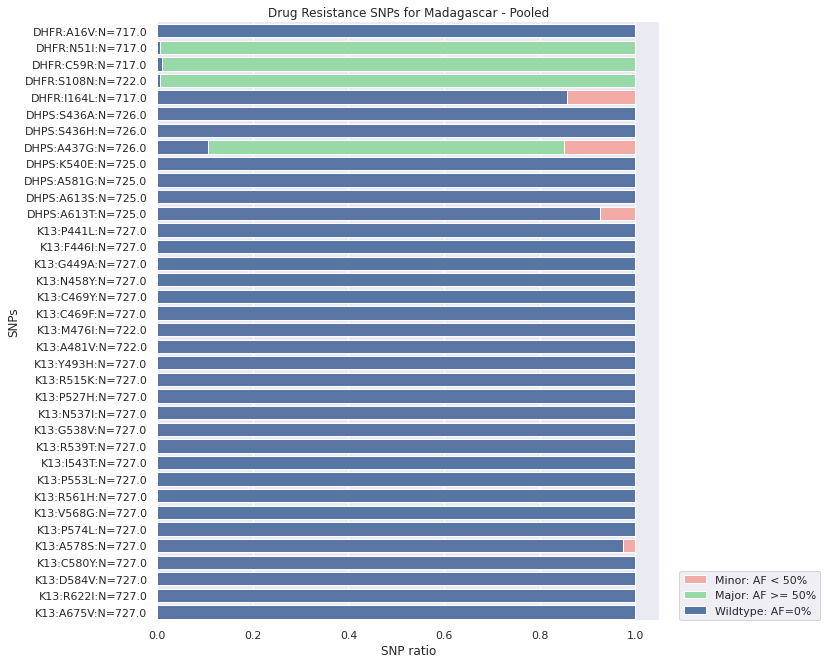

In [84]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
##Used the previously created table
df_table_SNP=pd.read_csv("Tab_Table_SNP_Total1_Comb.csv")
#print(df_table_SNP)
##Create different dataframe by adding different columns of raios
#df_table_SNP.rename(columns={'Gene+SNP':'GeneSNP'}, inplace=True) ##Change column name from trackersnp to g_annotation
#df_table_SNP.groupby(df_table_SNP.GeneSNP.str.split(":")[0])
df_table_SNP=df_table_SNP.sort_values(by=['GENE_G_anno'])
#print(df_table_SNP.GENE_G_anno.str.split(":").str[1])
#print(df_table_SNP.GENE_G_anno.str.split(":").str[1].str[1:-1])
df_table_SNP["index"]=df_table_SNP.GENE_G_anno.str.split(":").str[1].str[1:-1]
df_table_SNP["index"]=df_table_SNP["index"].astype(int)
df_table_SNP["index2"]=df_table_SNP.GENE_G_anno.str.split(":").str[0]

df_table_SNP=df_table_SNP.sort_values(["index"])
#df.groupby('A', sort=False)
df_table_SNP=df_table_SNP.groupby(['index2'], sort=False)
df_table_SNP=pd.concat(map(lambda x: x[1], df_table_SNP))
#print(df_table_SNP)
#df_table_SNP=df_table_SNP.sort_values(["index2"])
#print(df)
#df_table_SNP=df_table_SNP.sort_values(by=["index"])
#df_table_SNP=df_table_SNP.sort_values(["index2"])
#print(df_table_SNP.sort_values(by=["index","index2"]))

#print(idx)
#df_table_SNP = df_table_SNP.reindex(idx).reset_index(drop=True)
#print(df_table_SNP)
#idx = df['email'].str.split('@', expand=True).sort_values([1,0]).index
#df_table_SNP=df_table_SNP.GENE_G_anno.str.split(":").str[1].str[1:-1].sort_values().index
#df_table_SNP = df_table_SNP.reindex(df_table_SNP).reset_index(drop=True)
#print(sorted(df_table_SNP, key=lambda x: df_table_SNP.GENE_G_anno.str.split(":").str[1].str[1:-1]))
df_table_SNP["Total"]=df_table_SNP["Total"].astype(str)
df_table_SNP["NewCol"]=df_table_SNP["GENE_G_anno"]+":"+"N="+df_table_SNP["Total"] ##Create the label for y-axis 
###The visualization works by adding different number of bars 
###There are three bars (total1 which has all major, minor, wildtypes, total2, just wildtype and major, and just wildtype
###The purpose is to create a stacked bar plots
df_table_SNP["total"]=df_table_SNP["Minor: AF < 50%"]+df_table_SNP["Major: AF >= 50%"]+df_table_SNP["Wildtype: AF=0%"] ##Create total for adding up all the bars by adding all the values for major minor and wildtype 
df_table_SNP["total2"]=df_table_SNP["Major: AF >= 50%"]+df_table_SNP["Wildtype: AF=0%"]
f, ax = plt.subplots(figsize = (9,11))
sns.set_color_codes('pastel')
##Once dataframes are created just plot the dataframe to the graph
ax = sns.barplot(x="total", y="NewCol", label = "Minor: AF < 50%", data=df_table_SNP, color = 'r', edgecolor = 'w')
ax = sns.barplot(x="total2", y="NewCol", label= "Major: AF >= 50%", data=df_table_SNP, color = 'g', edgecolor = 'w')
sns.set_color_codes('deep')
ax = sns.barplot(x="Wildtype: AF=0%", y="NewCol", label= "Wildtype: AF=0%", data=df_table_SNP, color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
ax.set(ylabel="Gene+SNP+#_of_Samples")
ax.set(xlabel="Types of mutations ratio")
plt.legend(loc=(1.04,0))
ax.set(title="Drug Resistance SNPs for Madagascar - Pooled", ylabel="SNPs", xlabel="SNP ratio")

plt.savefig('MD_Bar_plot_Combined3', bbox_inches='tight')
plt.show()
